# 🛠️ Preparación de los Datos

In [2]:
import pandas as pd

df = pd.read_csv("telecomX_limpio.csv")
df.head()

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,account_Charges.Total,Cuentas_Diarias,customer_gender_male,internet_InternetService_fiber optic,internet_InternetService_no,account_Contract_one year,account_Contract_two year,account_PaymentMethod_credit card (automatic),account_PaymentMethod_electronic check,account_PaymentMethod_mailed check
0,0002-ORFBO,False,0,1,1,9,1,0.0,0.0,1.0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0003-MKNFE,False,0,0,0,9,1,1.0,0.0,0.0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,0004-TLHLJ,True,0,0,0,4,1,0.0,0.0,0.0,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,0011-IGKFF,True,1,1,0,13,1,0.0,0.0,1.0,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,0013-EXCHZ,True,1,1,0,3,1,0.0,0.0,0.0,...,267.40,2.796667,False,True,False,False,False,False,False,True


In [3]:
df.columns

Index(['customerID', 'Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'account_PaperlessBilling',
       'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias',
       'customer_gender_male', 'internet_InternetService_fiber optic',
       'internet_InternetService_no', 'account_Contract_one year',
       'account_Contract_two year',
       'account_PaymentMethod_credit card (automatic)',
       'account_PaymentMethod_electronic check',
       'account_PaymentMethod_mailed check'],
      dtype='object')

In [4]:
# Columnas a eliminar
cols_to_drop = ["customerID", "Cuentas_Diarias", "customer_gender_male"]

# Creación nuevo dataframe sin esas columnas
df_model = df.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)
print("Nuevas dimensiones:", df_model.shape)

Columnas eliminadas: ['customerID', 'Cuentas_Diarias', 'customer_gender_male']
Nuevas dimensiones: (7267, 23)


In [5]:
# Verificación de qué columnas siguen siendo categóricas
categorical_cols = df_model.select_dtypes(include=['object']).columns
print("Columnas categóricas detectadas:", categorical_cols.tolist())

# Aplicación de one-hot encoding
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

print("Dimensiones antes:", df_model.shape)
print("Dimensiones después:", df_encoded.shape)

Columnas categóricas detectadas: []
Dimensiones antes: (7267, 23)
Dimensiones después: (7267, 23)


In [7]:
# Distribución de la variable target (Churn)
churn_counts = df_model['Churn'].value_counts()
churn_ratio = df_model['Churn'].value_counts(normalize=True)

print("Cantidad de clientes por clase:")
print(churn_counts)

print("\nProporción de clientes por clase:")
print(churn_ratio)

Cantidad de clientes por clase:
Churn
False    5174
True     2093
Name: count, dtype: int64

Proporción de clientes por clase:
Churn
False    0.711986
True     0.288014
Name: proportion, dtype: float64


In [9]:
# Instalación
! pip install imbalanced-learn

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separación de features y target
X = df_model.drop('Churn', axis=1)  # Variables independientes
y = df_model['Churn']               # Variable objetivo

# Dividición en entrenamiento y prueba (estratificando por la clase)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificación el balance
print("Antes de SMOTE:")
print(y_train.value_counts())
print("\nDespués de SMOTE:")
print(y_train_res.value_counts())

Antes de SMOTE:
Churn
False    4139
True     1674
Name: count, dtype: int64

Después de SMOTE:
Churn
False    4139
True     4139
Name: count, dtype: int64


In [13]:
# Estandarización los datos numéricos
scaler = StandardScaler()

# Ajustar solo con el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_res)

# Transformación también el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Verificación forma de los datos finales
print("\nShape de X_train_scaled:", X_train_scaled.shape)
print("Shape de X_test_scaled:", X_test_scaled.shape)


Shape de X_train_scaled: (8278, 22)
Shape de X_test_scaled: (1454, 22)


# 🎯 Correlación y Selección de Variables

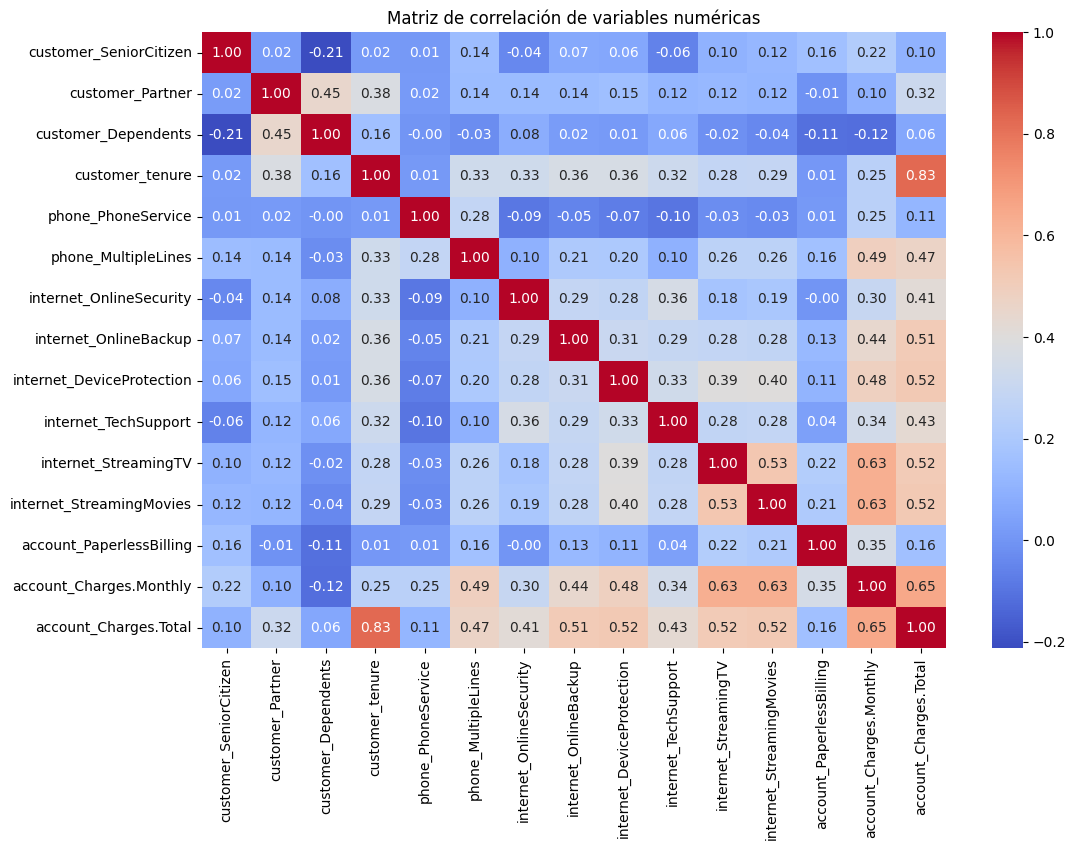

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de solo variables numéricas
numerical_cols = df_model.select_dtypes(include=['int64', 'float64']).columns

# Calculo de la correlación
correlation_matrix = df_model[numerical_cols].corr()

# Visualización la matriz con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.show()

/tmp/ipython-input-1924922732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.values, y=corr_churn.index, palette="coolwarm")


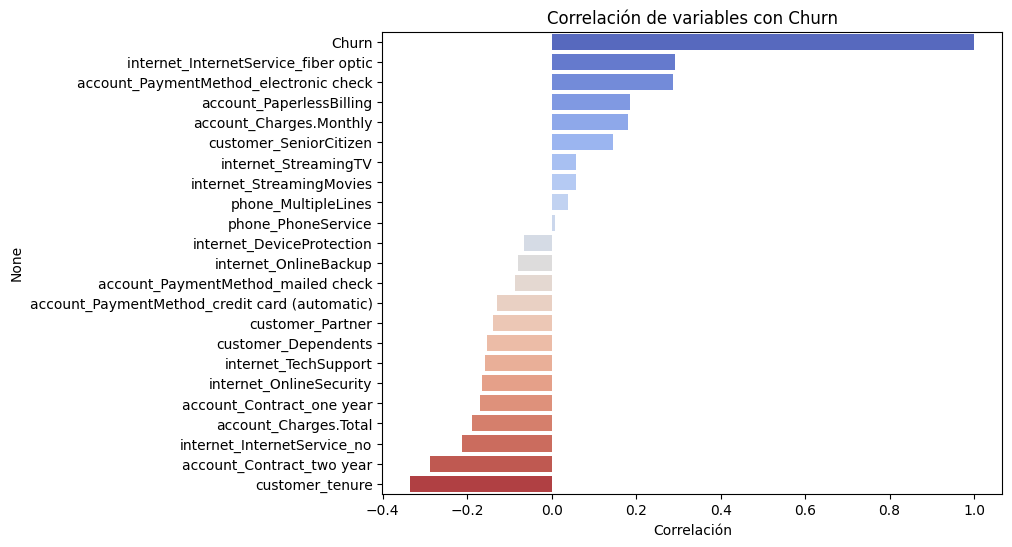

In [15]:
# Calculo de correlación de todas las variables con Churn
corr_churn = df_model.corr()['Churn'].sort_values(ascending=False)

# Grafico
plt.figure(figsize=(8,6))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette="coolwarm")
plt.title("Correlación de variables con Churn")
plt.xlabel("Correlación")
plt.show()

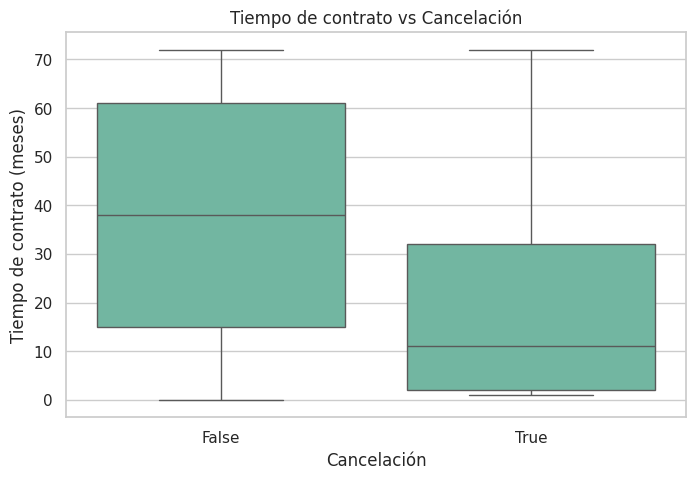

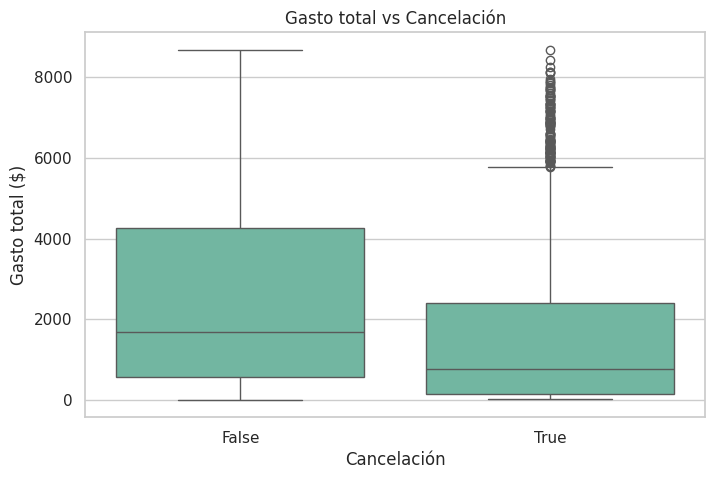

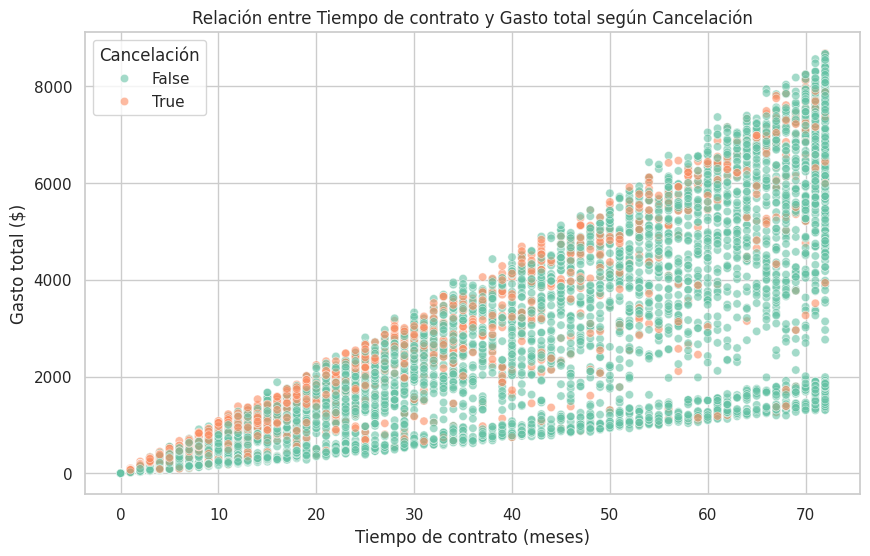

In [16]:
# Configuración de estilo
sns.set(style="whitegrid", palette="Set2")

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="customer_tenure", data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.ylabel("Tiempo de contrato (meses)")
plt.xlabel("Cancelación")
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="account_Charges.Total", data=df)
plt.title("Gasto total vs Cancelación")
plt.ylabel("Gasto total ($)")
plt.xlabel("Cancelación")
plt.show()

# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Cancelación
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="customer_tenure",
    y="account_Charges.Total",
    hue="Churn",
    data=df,
    alpha=0.6
)
plt.title("Relación entre Tiempo de contrato y Gasto total según Cancelación")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total ($)")
plt.legend(title="Cancelación")
plt.show()

# 🤖 Modelado Predictivo

In [17]:
# Variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["Churn", "customerID"])  # Quitamos la variable target y el ID
y = df["Churn"]

# División en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (5086, 24)
Tamaño del set de prueba: (2181, 24)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modelo 1: Regresión Logística (con normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Modelo 1: Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Modelo 2: Random Forest (sin normalización)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Modelo 2: Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 Modelo 1: Regresión Logística (con normalización)
Accuracy: 0.771205868867492
              precision    recall  f1-score   support

       False       0.81      0.88      0.85      1553
        True       0.63      0.50      0.56       628

    accuracy                           0.77      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.76      0.77      0.76      2181


🔹 Modelo 2: Random Forest (sin normalización)
Accuracy: 0.7528656579550664
              precision    recall  f1-score   support

       False       0.80      0.86      0.83      1553
        True       0.59      0.48      0.53       628

    accuracy                           0.75      2181
   macro avg       0.70      0.67      0.68      2181
weighted avg       0.74      0.75      0.75      2181



🔹 Regresión Logística
Accuracy: 0.771205868867492
Precision: 0.6277227722772277
Recall: 0.5047770700636943
F1-score: 0.559576345984113

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.85      1553
        True       0.63      0.50      0.56       628

    accuracy                           0.77      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.76      0.77      0.76      2181



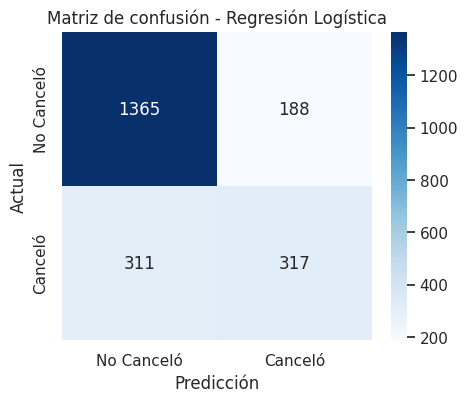

🔹 Random Forest
Accuracy: 0.7528656579550664
Precision: 0.586073500967118
Recall: 0.482484076433121
F1-score: 0.5292576419213973

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.86      0.83      1553
        True       0.59      0.48      0.53       628

    accuracy                           0.75      2181
   macro avg       0.70      0.67      0.68      2181
weighted avg       0.74      0.75      0.75      2181



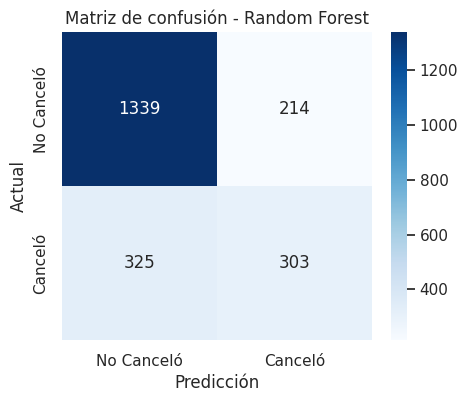


📊 Comparación de métricas:
                 Modelo  Accuracy  Precision    Recall  F1-score
0  Regresión Logística  0.771206   0.627723  0.504777  0.559576
1        Random Forest  0.752866   0.586074  0.482484  0.529258


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Función para evaluar modelos
def evaluar_modelo(nombre, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"🔹 {nombre}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Canceló", "Canceló"], yticklabels=["No Canceló", "Canceló"])
    plt.title(f"Matriz de confusión - {nombre}")
    plt.ylabel("Actual")
    plt.xlabel("Predicción")
    plt.show()

    return {"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

# Evaluación de ambos modelos
resultados = []
resultados.append(evaluar_modelo("Regresión Logística", y_test, y_pred_log))
resultados.append(evaluar_modelo("Random Forest", y_test, y_pred_rf))

# Comparación en DataFrame
resultados_df = pd.DataFrame(resultados)
print("\n📊 Comparación de métricas:\n", resultados_df)

##🔎 Análisis crítico
1. ¿Cuál modelo tuvo el mejor desempeño?

El modelo de Regresión Logística (con normalización) obtuvo un rendimiento ligeramente superior:

Mayor accuracy (77% vs 75%).

Mejor precision, recall y f1-score en la clase Canceló.
Esto lo convierte en el modelo más equilibrado entre ambos.

2. ¿Algún modelo presentó overfitting o underfitting?

 **🔹 Regresión Logística**

Posible underfitting:

Es un modelo lineal, lo que limita su capacidad para capturar relaciones complejas entre variables.

Aunque generaliza bien, no logra detectar a todos los clientes que cancelan (recall solo 50%).

Posibles ajustes:

Usar regularización diferente (l1, elasticnet).

Incluir interacciones o polinomios de variables.

Probar modelos más complejos (Gradient Boosting, XGBoost).

 **🔹 Random Forest**

Podría estar mostrando un ligero overfitting:

Suele ajustarse muy bien a datos de entrenamiento, pero su desempeño en test quedó un poco más bajo que la regresión logística.

Aunque robusto, parece que generaliza peor en este dataset.

Posibles ajustes:

Limitar la profundidad de los árboles (max_depth).

Ajustar min_samples_split o min_samples_leaf.

Aumentar el número de árboles (n_estimators) con regularización.


 ## Conclusión general

Ganador actual: Regresión Logística (mejor balance de métricas).

Problema en común: Ambos modelos tienen recall bajo en la clase Canceló → significa que están fallando en identificar clientes que efectivamente se dan de baja.

Causa probable: Desbalanceo de clases (más clientes que permanecen que los que cancelan).

# 📋 Interpretación y Conclusiones

In [22]:
import numpy as np
from sklearn.inspection import permutation_importance

# Importancia en Regresión Logística
coef = log_reg.coef_[0]
variables = X_train.columns
importancia_log = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coef,
    'Impacto_Absoluto': np.abs(coef)
}).sort_values(by='Impacto_Absoluto', ascending=False)

print("📌 Importancia de variables - Regresión Logística")
display(importancia_log.head(10))


# Importancia en Random Forest
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("📌 Importancia de variables - Random Forest")
display(importancia_rf.head(10))

📌 Importancia de variables - Regresión Logística


,Variable,Coeficiente,Impacto_Absoluto
3,customer_tenure,-0.761889,0.761889
20,account_Contract_two year,-0.390217,0.390217
17,internet_InternetService_fiber optic,0.312397,0.312397
19,account_Contract_one year,-0.286753,0.286753
4,phone_PhoneService,-0.212611,0.212611
18,internet_InternetService_no,-0.201973,0.201973
22,account_PaymentMethod_electronic check,0.188349,0.188349
9,internet_TechSupport,-0.182933,0.182933
6,internet_OnlineSecurity,-0.159110,0.159110
13,account_Charges.Monthly,0.126046,0.126046


📌 Importancia de variables - Random Forest


,Variable,Importancia
14,account_Charges.Total,0.165488
3,customer_tenure,0.152065
15,Cuentas_Diarias,0.138597
13,account_Charges.Monthly,0.137375
22,account_PaymentMethod_electronic check,0.038857
17,internet_InternetService_fiber optic,0.034294
20,account_Contract_two year,0.030857
19,account_Contract_one year,0.025504
16,customer_gender_male,0.025100
12,account_PaperlessBilling,0.024168


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

# Modelo 3: KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)   # usamos datos escalados para distancia
y_pred_knn = knn.predict(X_test_scaled)

print("\n🔹 Modelo 3: KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Modelo 4: SVM
svm_clf = SVC(kernel="rbf", probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

print("\n🔹 Modelo 4: SVM (RBF kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 Modelo 3: KNN
Accuracy: 0.7322329206785878
              precision    recall  f1-score   support

       False       0.80      0.83      0.81      1553
        True       0.54      0.50      0.52       628

    accuracy                           0.73      2181
   macro avg       0.67      0.66      0.67      2181
weighted avg       0.73      0.73      0.73      2181


🔹 Modelo 4: SVM (RBF kernel)
Accuracy: 0.7684548372306281
              precision    recall  f1-score   support

       False       0.81      0.89      0.85      1553
        True       0.63      0.47      0.54       628

    accuracy                           0.77      2181
   macro avg       0.72      0.68      0.69      2181
weighted avg       0.76      0.77      0.76      2181



In [24]:
# Importancia en KNN con Permutation Importance
perm_knn = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importancia_knn = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': perm_knn.importances_mean
}).sort_values(by='Importancia', ascending=False)

print("📌 Importancia de variables - KNN")
display(importancia_knn.head(10))


# Importancia en SVM con Permutation Importance
perm_svm = permutation_importance(svm_clf, X_test_scaled, y_test, n_repeats=10, random_state=42)
importancia_svm = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': perm_svm.importances_mean
}).sort_values(by='Importancia', ascending=False)

print("📌 Importancia de variables - SVM")
display(importancia_svm.head(10))

📌 Importancia de variables - KNN


,Variable,Importancia
3,customer_tenure,0.010821
19,account_Contract_one year,0.008161
17,internet_InternetService_fiber optic,0.007382
18,internet_InternetService_no,0.007061
12,account_PaperlessBilling,0.006190
14,account_Charges.Total,0.005961
23,account_PaymentMethod_mailed check,0.004860
0,customer_SeniorCitizen,0.004448
7,internet_OnlineBackup,0.003989
20,account_Contract_two year,0.003668


📌 Importancia de variables - SVM


,Variable,Importancia
17,internet_InternetService_fiber optic,0.022283
3,customer_tenure,0.017240
19,account_Contract_one year,0.011279
14,account_Charges.Total,0.006098
4,phone_PhoneService,0.002522
16,customer_gender_male,0.001146
5,phone_MultipleLines,0.001055
1,customer_Partner,0.000734
11,internet_StreamingMovies,0.000642
6,internet_OnlineSecurity,0.000138


#Informe de cancelación de clientes (Churn)

## **1) Resumen ejecutivo**

Mejor desempeño: la Regresión Logística (con normalización) obtiene la mayor accuracy (0.771), seguida muy de cerca por SVM (RBF) (0.768). Random Forest (0.753) y KNN (0.732) quedan por detrás.

Factores más influyentes (consistentes entre modelos):

customer_tenure (antigüedad) → a mayor antigüedad, menor riesgo (coeficiente negativo en Logística).

internet_InternetService_fiber optic → mayor riesgo de churn (coeficiente positivo).

account_Contract_one year / two year → menor riesgo frente a acuerdos mes a mes.

account_Charges.Monthly (cargos mensuales) → mayor riesgo (positiva).

account_PaymentMethod_electronic check → mayor riesgo.

internet_OnlineSecurity (tenerlo) → menor riesgo; su ausencia se asocia a más churn.

Interpretación general: el abandono se concentra en clientes recientes, con servicio de fibra, plan mes a mes, cargos mensuales altos, pago vía electronic check y sin servicios de seguridad online.


## **2) Rendimiento comparado de modelos**

Regresión Logística: Accuracy ≈ 0.771; (en los reportes extraídos se observa Precision ≈ 0.628, Recall ≈ 0.505, F1 ≈ 0.560 para la clase positiva).

SVM (RBF): Accuracy ≈ 0.768.

Random Forest: Accuracy ≈ 0.753; (Precision ≈ 0.586, Recall ≈ 0.482, F1 ≈ 0.529).

KNN: Accuracy ≈ 0.732.

Comentario: Logística y SVM rinden muy parecido en exactitud; la Logística añade interpretabilidad directa (signo y magnitud de coeficientes), lo que la hace ideal para acciones de negocio. RF aporta no linealidades, pero en este caso no supera a Logística/SVM.


## **3) Principales factores que afectan la cancelación**

A partir de las tablas de importancia y los coeficientes logísticos (consolidé la frecuencia con la que cada variable aparece en el Top de cada modelo y el signo en Logística):

customer_tenure — ↓ riesgo

Clientes nuevos (baja antigüedad) tienen mayor probabilidad de cancelar. Enfoque clave en el onboarding y en los primeros 90 días.

internet_InternetService_fiber optic — ↑ riesgo

Podría reflejar expectativas de performance más altas, incidencias de instalación, o sensibilidad al precio de los planes de fibra.

account_Contract_one year / two year — ↓ riesgo

Los contratos de mayor plazo retienen mejor que mes a mes.

account_Charges.Monthly (costo mensual) — ↑ riesgo

A mayor ticket mensual, más churn (probable elasticidad/precio percibido).

account_PaymentMethod_electronic check — ↑ riesgo

Este método se asocia con mayor probabilidad de baja (posible fricción en pagos o perfil de cliente).

internet_OnlineSecurity (contar con el servicio) — ↓ riesgo

Los add-ons de valor (seguridad online, soporte) anclan al cliente y reducen el abandono.

(En menor medida aparecen señales con phone_PhoneService y no Internet como protectores de churn, coherentes con mayor valor percibido y menor exposición a incidencias, respectivamente.)


## **4) Estrategias de retención basadas en hallazgos**

*A. Clientes de baja antigüedad (alto riesgo)*

Programa de “Primeros 90 días”: check-ins proactivos, tutorías de uso, verificación de calidad técnica, mensajes de valor (beneficios del plan).

Ofertas de bienvenida escalonadas: descuentos o upgrades temporales con recordatorios claros de valor antes de que expiren.

*B. Planificación de contratos*

Migración desde mes a mes → 1–2 años:

Bundles con descuento (ej., +OnlineSecurity / +Soporte técnico).

Bonos por permanencia (mes gratis al renovar, puntos de fidelidad).

Experimentos A/B para optimizar montos e incentivos por segmento (precio sensible vs. valor agregado).

*C. Gestión de precio (cargos mensuales altos)*

Planes escalonados/“lite” para clientes sensibles al precio.

Descuentos focalizados según propensión a churn (usando el score del modelo).

Alertas de riesgo por shock de precio (ej., aumento tarifario): contacto preventivo con alternativas.

*D. Servicio de fibra óptica (riesgo ↑)*

Auditoría de experiencia: tiempos de instalación, incidencias iniciales, latencia real vs. prometida.

Paquetes de valor: incluir OnlineSecurity y Soporte premium en fibra para elevar satisfacción.

Comunicación de performance: educar al cliente en optimización del Wi-Fi/equipamiento.

*E. Método de pago*

Incentivos para migrar desde “electronic check” a débito directo / tarjeta (bono por cambio, facilidad de gestión).

Recordatorios inteligentes y experiencia de pago sin fricciones (evitar rechazos/atrasos que detonen descontento).

*F. Servicios de valor agregado*

Campañas de upsell a OnlineSecurity y Soporte Técnico especialmente en segmentos de mayor riesgo (clientes nuevos, fibra, ticket alto).

Bundles temáticos (seguridad familiar, teletrabajo) con beneficios concretos.


## **5) Implementación operativa y próximos pasos**

Score de churn en producción

Usar Regresión Logística (baseline interpretable) + monitoreo. Mantener SVM como comparador/back-up.

Umbral operativo calibrado para maximizar Recall en campañas de retención (por ejemplo, priorizar recuperar al menos 60–65% de positivos con un F1 razonable).

Playbooks por segmento (con reglas simples):

Riesgo alto & baja antigüedad → Welcome-pack, tutoría + oferta de contrato anual.

Riesgo alto & fibra & ticket alto → revisión técnica + bundle valor + ajuste de plan.

Riesgo medio & electronic check → incentivo a cambio de método de pago.

Medición

Diseñar experimentos controlados por cohorte (A/B): medir reducción de churn y uplift por táctica.

Dashboards de seguimiento: churn semanal, adopción de contratos anuales, migración de método de pago, adjuntos de seguridad.

Mejoras de datos/modelado

Añadir tickets de soporte, NPS/CSAT, reclamos, tiempos de instalación, variación de precio.

Explorar XGBoost/LightGBM con tuning para buscar más Recall sin perder interpretabilidad (con SHAP).

Balanceo de clases y cost-sensitive learning si el costo de perder un cliente es alto.


## **6) Conclusión**

La antigüedad, el tipo de contrato, la tecnología de acceso (fibra), el costo mensual, el método de pago y la presencia de servicios de seguridad explican gran parte del churn.

Acciones concretas: onboarding temprano, migración a contratos anuales, bundles de valor (OnlineSecurity/Soporte), gestión de precio, e incentivos de método de pago.

Con un score de churn en producción y playbooks por segmento, es viable reducir el abandono de forma medible en el corto plazo.